### Game of Pig

Rules:

1. Two players take turns rolling a single die as many times as they wish. Each roll adds a score equal to the number rolled to the player's total.
2. If a player rolls a 1, their score for that turn is zero, and their turn ends.
3. At any point during a player's turn, they can choose to stop rolling and keep their score. The first player to reach 100 wins.

That's it! Let's play.

In [109]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

debug1 = False
debug2 = False

In [110]:
def game_play(N_stop,end_score):
    score = [0,0]
    turn = 0

    while score[0] < end_score and score[1] < end_score:
        turn_score = 0
        turn += 1
        if debug2:
            print("Turn", turn)
            for i in range(2):
                print("Player", i+1, "score:", score[i])
            print("Player", turn%2+1, "turn")
        roll = 0
        while roll != 1 and turn_score < N_stop:
            roll = random.randint(1,6)
            if debug2:
                print("Roll:", roll)
            if roll == 1:
                if debug2:
                    print("Player", turn%2+1, "loses turn")
                score[turn%2] = score[turn%2] - turn_score
                break
            else:
                score[turn%2] += roll
                if debug2:
                    print("Player", turn%2+1, "score:", score[turn%2])
                turn_score += roll
        if debug2:
            print("Player", turn%2+1, "turn over")
            print()

    if debug1:
        print(f"Final score: Player 1: {score[0]}, Player 2: {score[1]}")
        print(f"Player {np.argmax(score)+1} wins!")
        print(f"Game took {turn} turns")

    return 2.0*np.mean(score)/turn

In [ ]:

end_score = [50,100, 200, 500]
avg_array_sum = []
for j in range(4):
    avg_array = []
    for nstop in range(1,50):
        sum_avg = 0
        nsims = 100000
        for i in range(nsims):
            avg = game_play(nstop,end_score[j])
            sum_avg += avg
            #print(f"Average roll over all turns = {avg}")

        print(f"Average roll over all turns and sims for N_stop = {nstop} is {sum_avg/nsims}")
        avg_array.append(sum_avg/nsims)

    avg_array_sum.append(avg_array)


Average roll over all turns and sims for N_stop = 1 is 3.371391220129348
Average roll over all turns and sims for N_stop = 2 is 3.370555630375319
Average roll over all turns and sims for N_stop = 3 is 3.8796451142045543
Average roll over all turns and sims for N_stop = 4 is 4.3679943204088385
Average roll over all turns and sims for N_stop = 5 is 4.913036465531914
Average roll over all turns and sims for N_stop = 6 is 5.51043569047751
Average roll over all turns and sims for N_stop = 7 is 6.164111390203669
Average roll over all turns and sims for N_stop = 8 is 6.465565866115786
Average roll over all turns and sims for N_stop = 9 is 6.8488628776496325
Average roll over all turns and sims for N_stop = 10 is 7.198605758453734
Average roll over all turns and sims for N_stop = 11 is 7.550160149351679
Average roll over all turns and sims for N_stop = 12 is 7.839349999919814
Average roll over all turns and sims for N_stop = 13 is 8.079939811182317
Average roll over all turns and sims for N_st

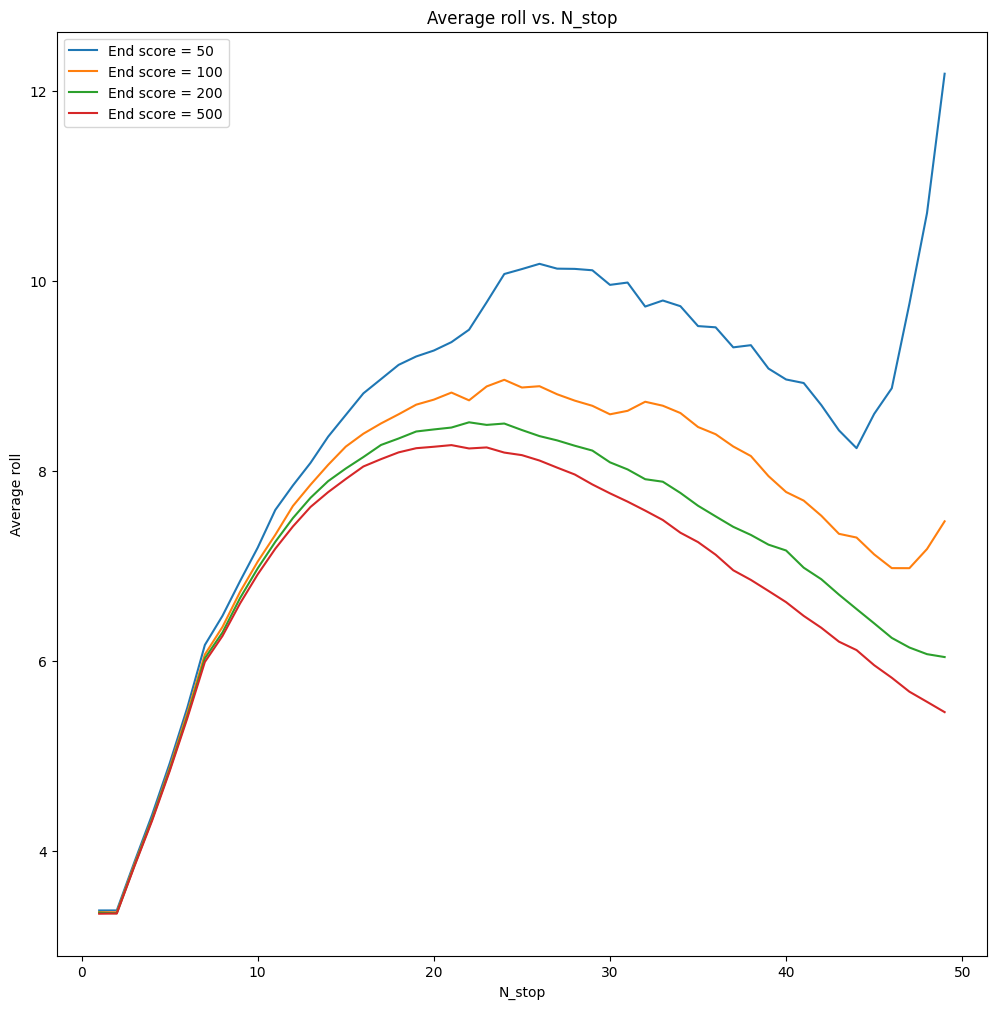

In [108]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
for j in range(4):
    ax.plot(range(1,50), avg_array_sum[j], label=f"End score = {end_score[j]}")
    ax.set_xlabel("N_stop")
    ax.set_ylabel("Average roll")
    ax.legend()
    ax.set_title("Average roll vs. N_stop")